# Warsztaty Python w Data Science

---
## Pobieranie danych przez API

- ## Pobranie danych
   #### - JSON. Pobieranie danych ze zdalnych API typu REST.
   #### - Data Wrangling

- ##  Przykłady _*Feature Engineering*_
- ##  Wizualizacje

---

# *'Applied machine learning'* is basically feature engineering. <div style="text-align: right">—  Prof. Andrew Ng</div> 

---

## Pobranie danych ze zdalnych API

API

https://api.covid19api.com/

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

## JavaScript Object Notation - JSON

In [1]:
import json
from pprint import pprint

data = [ {"Name": "Jan", "Surname": "Kowalski", "Age": 37}, {"Name": "Marek", "Surname": "Nowak", "Age": 53}]

my_json_string = json.dumps(data)
type(my_json_string)
pprint(my_json_string)

('[{"Name": "Jan", "Surname": "Kowalski", "Age": 37}, {"Name": "Marek", '
 '"Surname": "Nowak", "Age": 53}]')


In [2]:
my_json_object = json.loads(my_json_string)
pprint(my_json_object)

[{'Age': 37, 'Name': 'Jan', 'Surname': 'Kowalski'},
 {'Age': 53, 'Name': 'Marek', 'Surname': 'Nowak'}]


# Pobieranie danych ze zdalnych API

In [3]:
import requests

In [4]:
import requests
from pprint import pprint

url = "https://api.covid19api.com/"
response = requests.request(method="GET", url=url)
pprint(response.text)

('{"countriesRoute":{"Name":"Get List Of Countries","Description":"Returns all '
 'countries and associated provinces. The country_slug variable is used for '
 'country specific '
 'data","Path":"/countries"},"countryDayOneRoute":{"Name":"Get List Of Cases '
 'Per Country Per Province By Case Type From The First Recorded '
 'Case","Description":"Returns all cases by case type for a country from the '
 'first recorded case. Country must be the country_slug from /countries. Cases '
 'must be one of: confirmed, recovered, '
 'deaths","Path":"/dayone/country/:country"},"countryDayOneTotalRoute":{"Name":"Get '
 'List Of Cases Per Country By Case Type From The First Recorded '
 'Case","Description":"Returns all cases by case type for a country from the '
 'first recorded case. Country must be the country_slug from /countries. Cases '
 'must be one of: confirmed, recovered, '
 'deaths","Path":"/total/dayone/country/:country"},"countryRoute":{"Name":"Get '
 'List Of Cases Per Country Per Provi

In [5]:
from pprint import pprint

json_response = response.json()
pprint(json_response.keys())

dict_keys(['countriesRoute', 'countryDayOneRoute', 'countryDayOneTotalRoute', 'countryRoute', 'countryRoutePremium', 'countryRoutePremiumData', 'countryStatusDayOneLiveRoute', 'countryStatusDayOneRoute', 'countryStatusDayOneTotalRoute', 'countryStatusLiveRoute', 'countryStatusRoute', 'countryStatusTotalRoute', 'countrySummaryRoutePremium', 'countryTestingPremium', 'countryTotalRoute', 'exportRoute', 'liveCountryRoute', 'liveCountryStatusAfterDateRoute', 'liveCountryStatusRoute', 'summaryRoute', 'travelAdvicePremium', 'webhookRoute'])


In [6]:
pprint(json_response["countriesRoute"])

{'Description': 'Returns all countries and associated provinces. The '
                'country_slug variable is used for country specific data',
 'Name': 'Get List Of Countries',
 'Path': '/countries'}


In [7]:
url = "https://api.covid19api.com/countries"
response = requests.request(method="GET", url=url)
pprint(response.json()[:15])

[{'Country': 'Central African Republic',
  'ISO2': 'CF',
  'Slug': 'central-african-republic'},
 {'Country': 'Solomon Islands', 'ISO2': 'SB', 'Slug': 'solomon-islands'},
 {'Country': 'Tajikistan', 'ISO2': 'TJ', 'Slug': 'tajikistan'},
 {'Country': 'Zambia', 'ISO2': 'ZM', 'Slug': 'zambia'},
 {'Country': 'Macedonia, Republic of', 'ISO2': 'MK', 'Slug': 'macedonia'},
 {'Country': 'Singapore', 'ISO2': 'SG', 'Slug': 'singapore'},
 {'Country': 'Turkey', 'ISO2': 'TR', 'Slug': 'turkey'},
 {'Country': 'Burkina Faso', 'ISO2': 'BF', 'Slug': 'burkina-faso'},
 {'Country': 'Liberia', 'ISO2': 'LR', 'Slug': 'liberia'},
 {'Country': 'Micronesia, Federated States of',
  'ISO2': 'FM',
  'Slug': 'micronesia'},
 {'Country': 'Northern Mariana Islands',
  'ISO2': 'MP',
  'Slug': 'northern-mariana-islands'},
 {'Country': 'Pitcairn', 'ISO2': 'PN', 'Slug': 'pitcairn'},
 {'Country': 'Swaziland', 'ISO2': 'SZ', 'Slug': 'swaziland'},
 {'Country': 'Algeria', 'ISO2': 'DZ', 'Slug': 'algeria'},
 {'Country': 'Mozambique',

In [8]:
import json
import requests 
import pandas as pd
import numpy as np
from datetime import datetime 
import warnings
warnings.filterwarnings("ignore")

countries = ['us']

url = "https://api.covid19api.com/total/dayone/country/%s"

input_data = []

with requests.Session() as s:
    for country in countries:
        input_data += s.get(url%country).json()
        
input_data[:5]

[{'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-22T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-23T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-24T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-25T00:00:00Z'},
 {'Country': 'United States of Ameri

In [9]:
import json
import requests 
import pandas as pd
import numpy as np
from datetime import datetime 
import warnings
warnings.filterwarnings("ignore")

countries = ['pl', 'us', 'it', 'uk', 'es', 'cn', 'ir', 'tr', 'se', 'de' ]

url = "https://api.covid19api.com/total/dayone/country/%s"

input_data = []

with requests.Session() as s:
    for country in countries:
        input_data += s.get(url%country).json()

now = datetime.now().strftime("%Y-%m-%d")
countries.append(now)
fname = 'data\\'+'-'.join(countries)+".json"
with open(fname, 'w') as f:
    json.dump(input_data, f)
    print(f'Zapisałem plik {fname}')

print("Przeczytano %d wierszy " % len(input_data) )

raw_data = pd.DataFrame(input_data)
raw_data

Zapisałem plik data\pl-us-it-uk-es-cn-ir-tr-se-de-2022-02-21.json
Przeczytano 7448 wierszy 


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Poland,,,,,0,0,1,0,0,1,2020-03-04T00:00:00Z
1,Poland,,,,,0,0,1,0,0,1,2020-03-05T00:00:00Z
2,Poland,,,,,0,0,5,0,0,5,2020-03-06T00:00:00Z
3,Poland,,,,,0,0,5,0,0,5,2020-03-07T00:00:00Z
4,Poland,,,,,0,0,11,0,0,11,2020-03-08T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
7443,Germany,,,,,0,0,13093881,120732,0,12973149,2022-02-16T00:00:00Z
7444,Germany,,,,,0,0,13309040,120997,0,13188043,2022-02-17T00:00:00Z
7445,Germany,,,,,0,0,13491802,121207,0,13370595,2022-02-18T00:00:00Z
7446,Germany,,,,,0,0,13605445,121280,0,13484165,2022-02-19T00:00:00Z


---
## Parametry sterujące analizą
- `DAYS_WINDOW` - za ile dni wstecz od najświeższych danych w zbiorze ma być wykonana analiza np. `DAYS_WINDOW=7` - dane z tygodnia
- `N` - dla ilu krajów naraz ma być wykonana analiza
- `SET` - dla której _"N-ki"_  ma być wykonana analiza; np. przy `N=10` dla `SET=0` będzie to 1-sza dziesiątka, `SET=1` będzie to 2-ga dziesiątka itd.
- `ROLL` - za ile dni ma być liczona średnia krocząca
- `DELTADAYS` - przy ustalaniu składu kolejnych `N` brana jest wartość `Confirmed` sprzed `DELTADAYS` dni. Przydaje się w sytuacji gdy nie "spłynęły" wszystkie dane dla bieżącego dnia
---

In [11]:
DAYS_WINDOW=60
N=10 
SET=0
ROLL=7
DELTADAYS=1

In [12]:

data = raw_data[ ["Country", "CountryCode", "Confirmed", "Deaths", "Recovered", "Active", "Date"] ]
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', format='%Y-%m-%dT%H:%M:%S') 
data['Day'] = data['Date'].dt.date

data = data.dropna()
print("Na wejściu mamy %d rekordów i %d kolumn" % (data.shape[0],data.shape[1]))

lastday = max(data["Date"])
daysbefore = lastday + pd.Timedelta(days=-DAYS_WINDOW)
print("Dane od %s do %s" % (str(daysbefore).split(' ')[0], str(lastday).split(' ')[0]) )

lastday = lastday + pd.Timedelta(days=-DELTADAYS)

df = data[ data["Date"] > pd.to_datetime(daysbefore) ]
print("Zostało %d rekordów i %d kolumn" % (df.shape[0],df.shape[1]))

## Czyścimy śmieci
df = df.replace('Iran (Islamic Republic of)', 'Iran')
df = df.replace('Iran, Islamic Republic of', 'Iran')
df = df.replace('Korea, South', 'South Korea')
df = df.replace('Korea (South)', 'South Korea')
df = df.replace('Republic of Korea', 'South Korea')
df = df.replace('Russian Federation', 'Russia')
df = df.replace(' Azerbaijan', 'Azerbaijan')
df = df.replace('Republic of Ireland', 'Ireland')
df = df.replace('Republic of Moldova', 'Moldova')
df = df.replace('Hong Kong SAR', 'Hong Kong')
df = df.replace('Taipei and environs', 'Taiwan')
df = df.replace('Taiwan*', 'Taiwan')


confirmed = df[['Country', 'CountryCode', 'Date', 'Day', 'Confirmed']]
confirmed["status"] = "Confirmed"
confirmed.rename(columns={'Confirmed':'cases'}, inplace=True)
deaths = df[['Country', 'CountryCode', 'Date', 'Day', 'Deaths']]
deaths["status"] = "Deaths"
deaths.rename(columns={'Deaths':'cases'}, inplace=True)
recovered = df[['Country', 'CountryCode', 'Date', 'Day', 'Recovered']]
recovered["status"] = "Recovered"
recovered.rename(columns={'Recovered':'cases'}, inplace=True)
active = df[['Country', 'CountryCode', 'Date', 'Day', 'Active']]
active["status"] = "Active"
active.rename(columns={'Active':'cases'}, inplace=True)

df = pd.concat([confirmed, deaths, recovered, active], axis=0, sort=False)
print("Po 'ręcznym' melt mamy %d rekordów i %d kolumn: %s" % ( df.shape[0],df.shape[1], " ".join(df.columns) ))

df = df.groupby(['Country', 'CountryCode', 'Date', 'Day', 'status', 'cases',]).sum()
df.reset_index(inplace=True)
print("Po agregacji prowincji mamy %d rekordów i %d kolumn: %s" % ( df.shape[0],df.shape[1], " ".join(df.columns) ))


df = df.pivot_table(
        values='cases', 
        index=['Country', 'CountryCode', 'Date', 'Day'], 
        columns='status', 
        aggfunc=np.sum)

df.reset_index(inplace=True)

print("Po operacji pivot mamy %d rekordów i %d kolumn:  %s" % ( df.shape[0], df.shape[1], " ".join(df.columns) ))

topdf = df[ df["Date"] == lastday ]
topdf.reset_index(inplace=True)
topdf = topdf.sort_values(by=['Confirmed'], ascending=False)

topdf.reset_index(drop=True, inplace=True)

first_N_countries = topdf.iloc[N*SET:N*SET+N]["Country"]
smaller_top_N = topdf.iloc[N*SET:(N*SET+N//2)]["Country"]

italy = df[ df['Country'] == 'Italy'  ] 
us = df[ df['Country'] == 'United States of America'  ] 

df = df[ df['Country'].isin(first_N_countries)  ]
df = df.sort_values(by=['Country', 'Date'])
df.reset_index(inplace=True)

print("Po odfiltrowaniu mamy %d rekordów i %d kolumn: %s" % ( df.shape[0],df.shape[1]," ".join(df.columns) ))
print("Przygotowane dane z %d dni dla %d krajów" % 
      ( len(df["Date"].value_counts()), len(df["Country"].value_counts()) ))

df.head()

smaller_df = df[ df['Country'].isin(smaller_top_N)  ]
smaller_df = smaller_df.sort_values(by=['Country', 'Date'])
smaller_df.reset_index(drop=True, inplace=True)

print("Po odfiltrowaniu mniejszych danych mamy %d rekordów i %d kolumn: %s" % ( smaller_df.shape[0],smaller_df.shape[1]," ".join(smaller_df.columns) ))
print("Przygotowane mniejsze dane z %d dni dla %d krajów" % 
      ( len(smaller_df["Date"].value_counts()), len(smaller_df["Country"].value_counts()) ))
smaller_df.head()

Na wejściu mamy 7448 rekordów i 8 kolumn
Dane od 2021-12-22 do 2022-02-20
Zostało 600 rekordów i 8 kolumn
Po 'ręcznym' melt mamy 2400 rekordów i 6 kolumn: Country CountryCode Date Day cases status
Po agregacji prowincji mamy 2400 rekordów i 6 kolumn: Country CountryCode Date Day status cases
Po operacji pivot mamy 600 rekordów i 8 kolumn:  Country CountryCode Date Day Active Confirmed Deaths Recovered
Po odfiltrowaniu mamy 600 rekordów i 9 kolumn: index Country CountryCode Date Day Active Confirmed Deaths Recovered
Przygotowane dane z 60 dni dla 10 krajów
Po odfiltrowaniu mniejszych danych mamy 300 rekordów i 9 kolumn: index Country CountryCode Date Day Active Confirmed Deaths Recovered
Przygotowane mniejsze dane z 60 dni dla 5 krajów


status,index,Country,CountryCode,Date,Day,Active,Confirmed,Deaths,Recovered
0,60,Germany,,2021-12-23 00:00:00+00:00,2021-12-23,6868046,6978170,110124,0
1,61,Germany,,2021-12-24 00:00:00+00:00,2021-12-24,6871959,6982238,110279,0
2,62,Germany,,2021-12-25 00:00:00+00:00,2021-12-25,6889109,6999476,110367,0
3,63,Germany,,2021-12-26 00:00:00+00:00,2021-12-26,6899212,7009648,110436,0
4,64,Germany,,2021-12-27 00:00:00+00:00,2021-12-27,6917588,7028398,110810,0


In [13]:
topdf.head(10)

status,index,Country,CountryCode,Date,Day,Active,Confirmed,Deaths,Recovered
0,598,United States of America,,2022-02-19 00:00:00+00:00,2022-02-19,77522130,78457081,934951,0
1,538,United Kingdom,,2022-02-19 00:00:00+00:00,2022-02-19,18549301,18710375,161074,0
2,118,Germany,,2022-02-19 00:00:00+00:00,2022-02-19,13484165,13605445,121280,0
3,478,Turkey,,2022-02-19 00:00:00+00:00,2022-02-19,13341942,13434130,92188,0
4,238,Italy,,2022-02-19 00:00:00+00:00,2022-02-19,12274925,12427773,152848,0
5,358,Spain,,2022-02-19 00:00:00+00:00,2022-02-19,10711224,10809222,97998,0
6,178,Iran,,2022-02-19 00:00:00+00:00,2022-02-19,6790687,6925485,134798,0
7,298,Poland,,2022-02-19 00:00:00+00:00,2022-02-19,5390936,5500728,109792,0
8,418,Sweden,,2022-02-19 00:00:00+00:00,2022-02-19,2406004,2422856,16852,0
9,58,China,,2022-02-19 00:00:00+00:00,2022-02-19,125020,129914,4894,0


# Wizualizacja

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Wykres dla `N` krajów

In [15]:
def fix_legend(chart, marker="o"):
    handles, labels = chart.get_legend_handles_labels()
    sorting_order = dict(map(lambda x: (x[1],x[0]), enumerate(first_N_countries)))
    labels_handles = list(zip(labels,handles))

    labels_handles.sort(key = lambda x: sorting_order.get(x[0],-1))
    labels = [ x[0] for x in labels_handles]
    handles = [ x[1] for x in labels_handles]
    for handle in handles: 
        handle.set_marker(marker)
        handle.set_markeredgecolor("black")
        
    return handles, labels

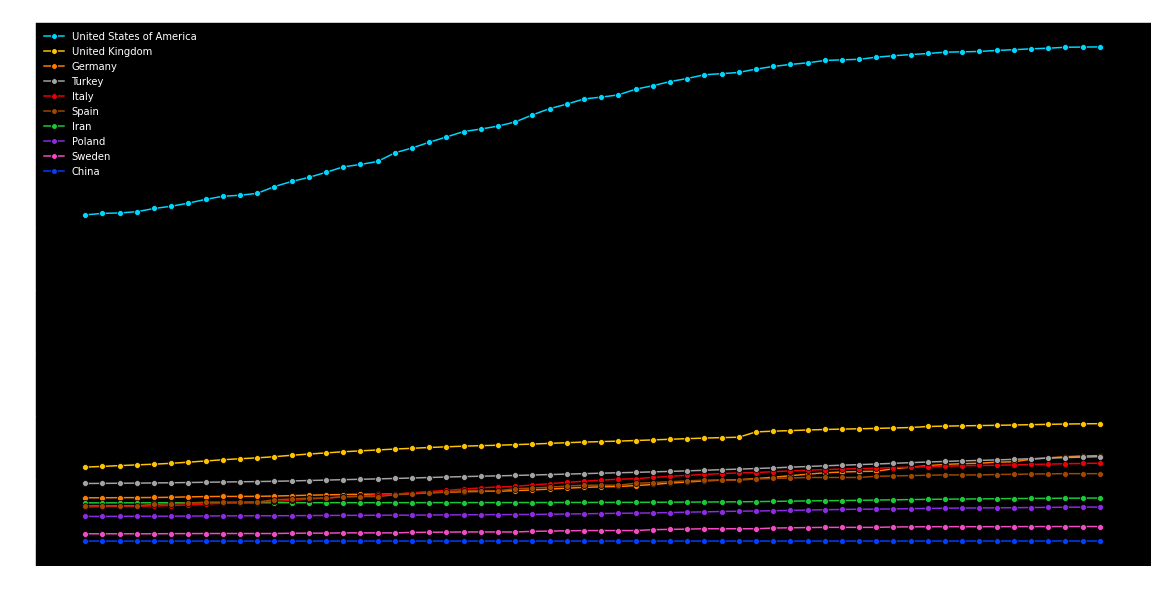

In [16]:

plt.figure(figsize=(20,10))


plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Confirmed',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',  markeredgecolor="black",   
                     data=df
                    )

chart.set_title('Confirmed COVID-19 Cases')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

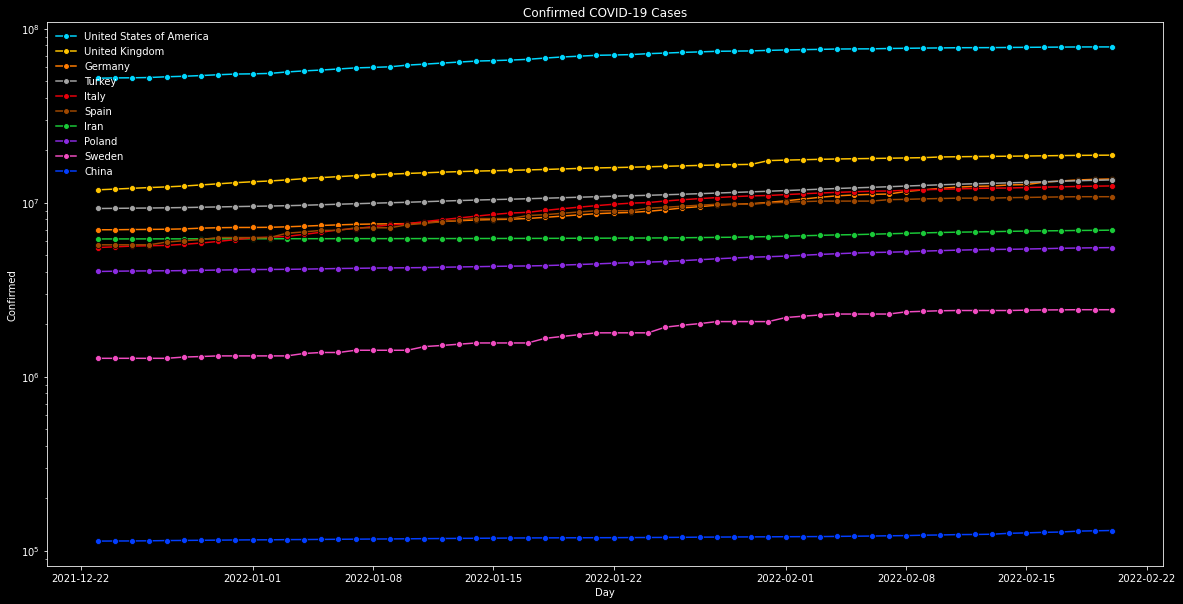

In [17]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Confirmed',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',    markeredgecolor="black",
                     data=df
                    )

chart.set_title('Confirmed COVID-19 Cases')


handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.yscale("log")

plt.show();

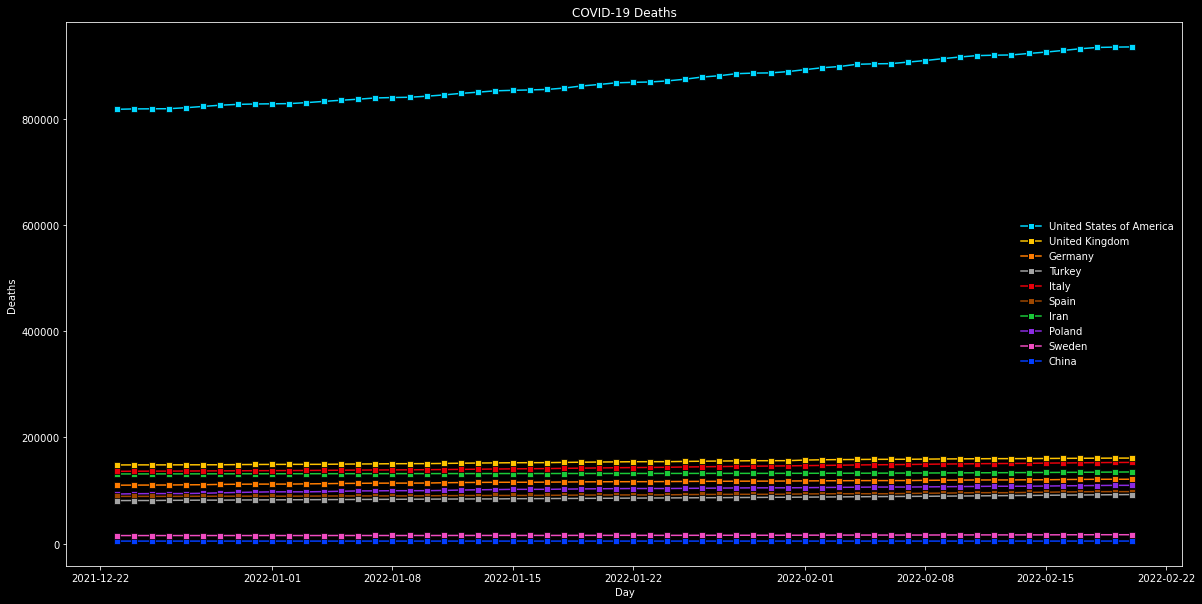

In [18]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Deaths',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright',    markeredgecolor="black",
                     data=df
                    )

chart.set_title('COVID-19 Deaths')

handles, labels = fix_legend(chart, marker='s')
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

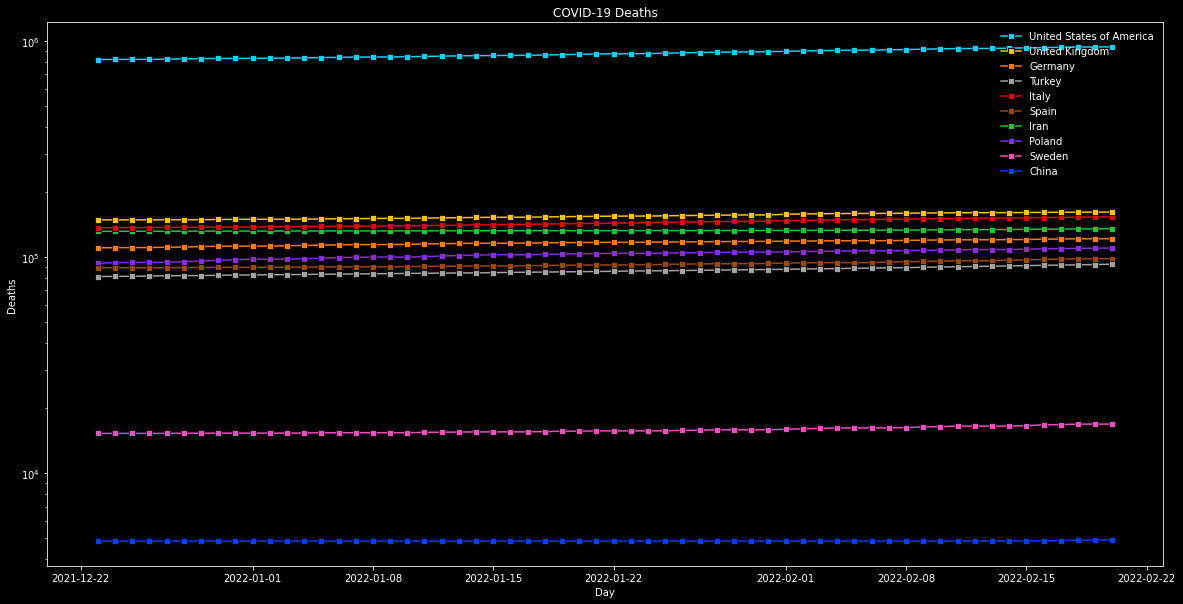

In [19]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Deaths',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright',    markeredgecolor="black",
                     data=df
                    )

chart.set_title('COVID-19 Deaths')

handles, labels = fix_legend(chart, marker='s')
plt.legend(handles, labels, frameon=False, loc="best")
plt.yscale("log")

plt.show();

Dwa zestawy danych 

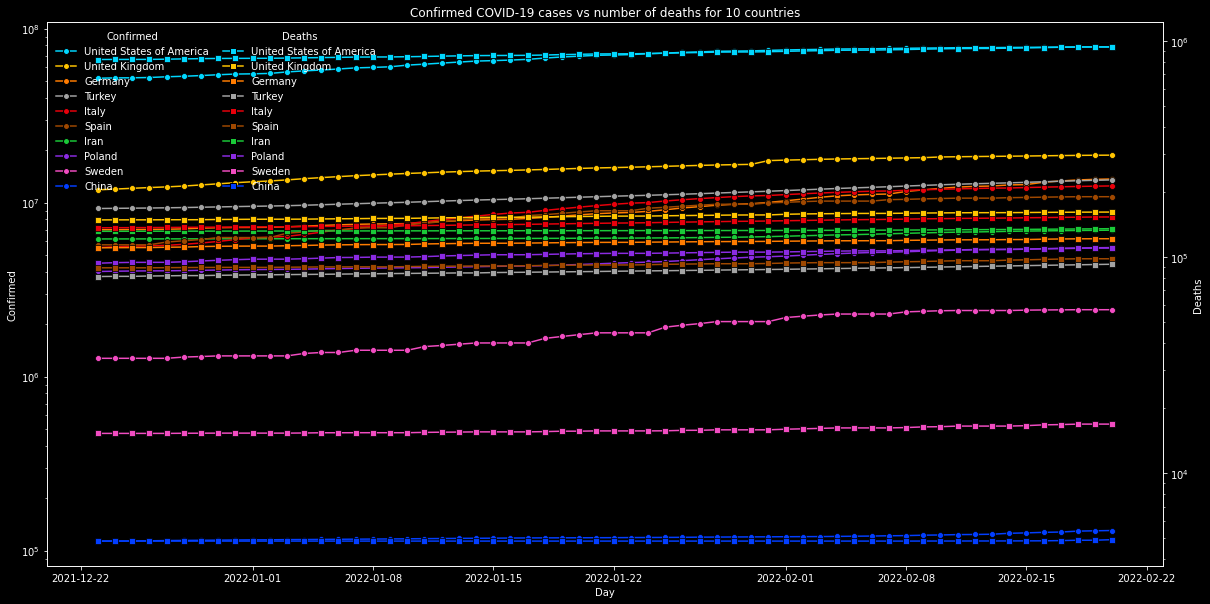

In [20]:
plotdata=df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Confirmed',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",    
                     data=plotdata
                    )

chart.set_title('Confirmed COVID-19 cases vs number of deaths for %d countries' % N)

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc=2, title="Confirmed")
plt.yscale("log")
ax2 = chart.twinx()

chart2 = sns.lineplot(x='Day',
                     y='Deaths',
                     hue='Country', linestyle='-', marker='s',
                     palette='bright',    
                     data=plotdata, markeredgecolor="black",
                       ax=ax2
                    )

handles, labels = fix_legend(chart2, marker="s")
legend2 = plt.legend(handles, labels, loc=2, frameon=False, title="Deaths", bbox_to_anchor=(0.15, 1))
plt.yscale("log")
plt.show();

Mniej krajów

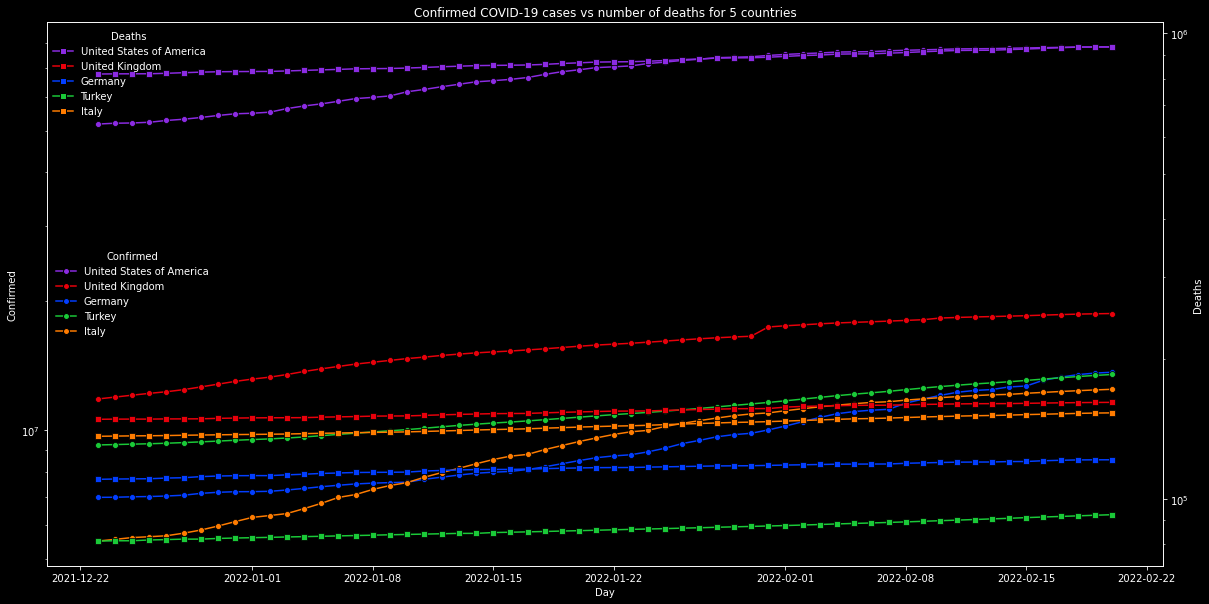

In [21]:
plotdata=smaller_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Confirmed',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',  markeredgecolor="black",
                     data=plotdata
                    )


chart.set_title('Confirmed COVID-19 cases vs number of deaths for %d countries' % (N//2))
plt.yscale("log")
handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="center left", title="Confirmed")

ax2 = chart.twinx()

chart2 = sns.lineplot(x='Day',
                     y='Deaths',
                     hue='Country', linestyle='-', marker='s',
                     palette='bright',    markeredgecolor="black",
                     data=plotdata,
                       ax=ax2
                    )

handles, labels = fix_legend(chart2, marker="s")
legend2 = plt.legend(handles, labels, loc=1, frameon=False, title="Deaths", bbox_to_anchor=(0.15, 1))
plt.yscale("log")
plt.show();

## Dodanie wymiarów - stosunek między wymiarami

In [22]:
df["Mortality"] = 100*df["Deaths"]    / df["Confirmed"] 
df["Recovery"]  = 100*df["Recovered"] / df["Confirmed"] 

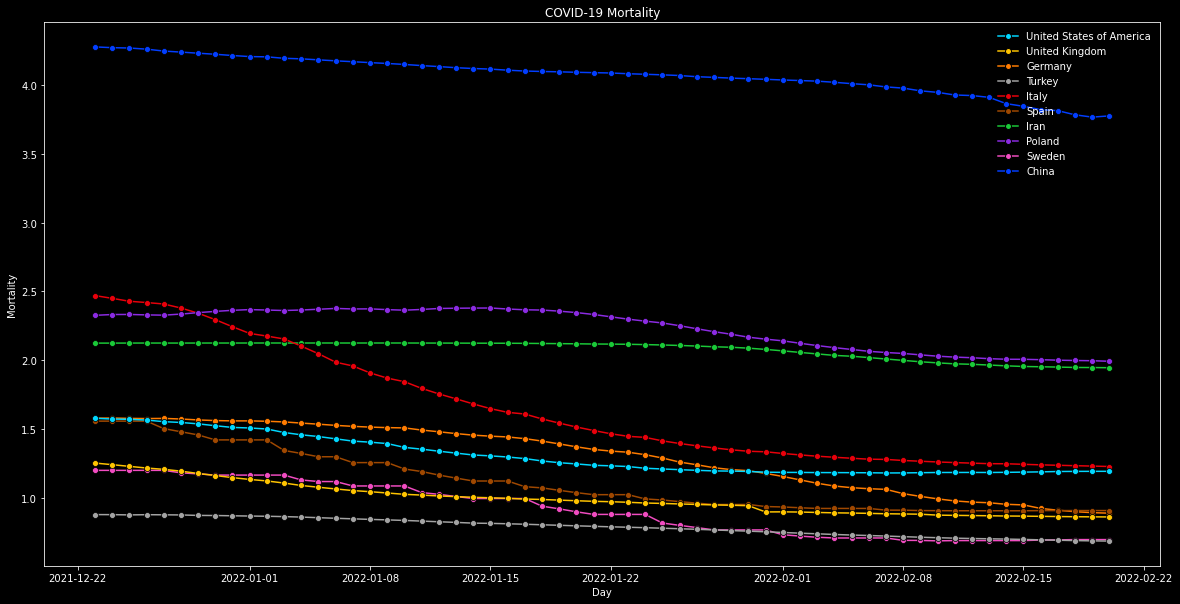

In [23]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Mortality',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright',    markeredgecolor="black",
                     data=df
                    )

chart.set_title('COVID-19 Mortality')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

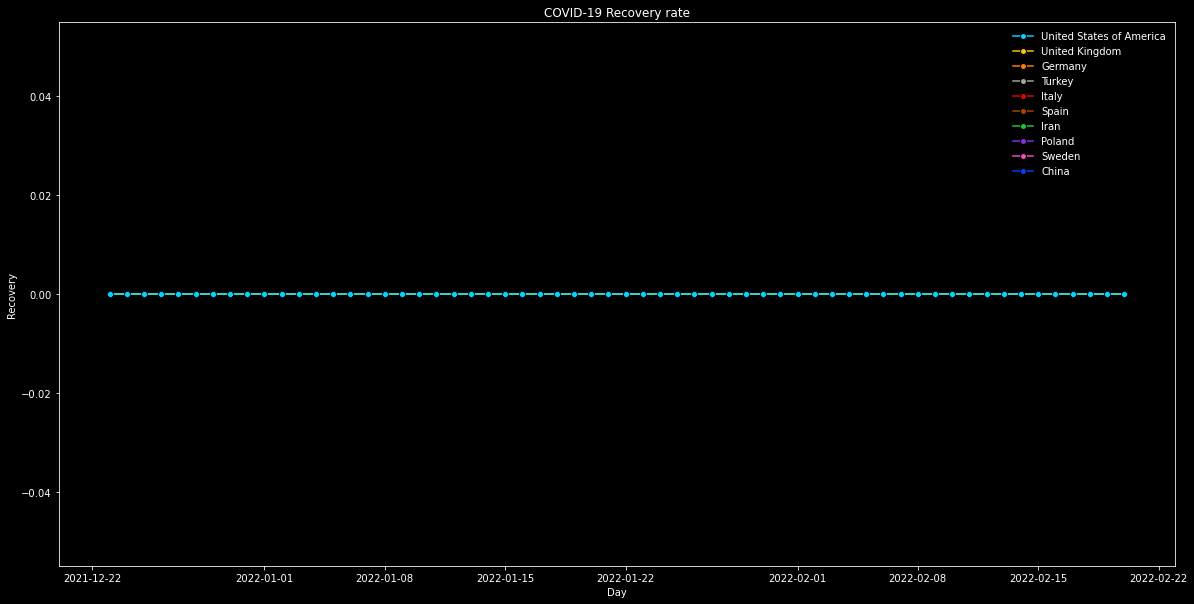

In [24]:
plotdata=df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='Recovery',
                     hue='Country', linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",
                     data=plotdata
                    )

chart.set_title('COVID-19 Recovery rate')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

## Wymiary jako funkcja kilku wierszy - różnica i średnia krocząca 

In [25]:
result = []

countries = df["Country"].unique()
dataframes = [ df[ df["Country"] == x] for x in countries ] 

for m_df in dataframes:
    country = m_df['Country'].iloc[0]
    m_df = m_df[ ["Day", "Confirmed", "Deaths", "Recovered"] ]
    m_df.set_index("Day", inplace=True)
    df_diff = m_df.diff()
    df_diff.columns=["confirmed change", "deaths change", "recovered change"]
    
    m_df = pd.concat([m_df, df_diff], axis=1, sort=False)
    
    m_df["confirmed pct change"] = 100.0 * m_df["confirmed change"] / m_df["Confirmed"]
    m_df["confirmed pct change"]  = m_df["confirmed pct change"].apply(lambda x: x if x > -50.0 else 0.0)

    m_df["deaths pct change"] = 100.0 * m_df["deaths change"] / m_df["Deaths"]
    m_df["deaths pct change"]  = m_df["deaths pct change"].apply(lambda x: x if x > -50.0 else 0.0)
    m_df["deaths pct change"]  = m_df["deaths pct change"].apply(lambda x: x if x < 399.0 else 0.0)
    
    m_df["rolling deaths change"] = m_df["deaths change"] .rolling(window=ROLL).mean()
    m_df["rolling confirmed pct change"] = m_df["confirmed pct change"] .rolling(window=ROLL).mean()
    m_df["rolling deaths pct change"] = m_df["deaths pct change"] .rolling(window=ROLL).mean()
    m_df = m_df.dropna()
    
    m_df = m_df.sort_values(by="Day")
    m_df["Country"] = country
    m_df.reset_index(inplace=True)
    result.append(m_df)
    
new_df = pd.concat(result, axis=0, sort=False)
today = max(new_df["Day"])
d=new_df[ new_df["Day"] == today].sort_values(by=['Confirmed'], ascending=False).reset_index()
d["index"] = d["Country"]

d.drop(["Country"], axis=1, inplace=True)
cols = list(d.columns)
cols[0] = 'Country'
d.columns = cols
d.reset_index(inplace=True, drop=True)
d

,Country,Day,Confirmed,Deaths,Recovered,confirmed change,deaths change,recovered change,confirmed pct change,deaths pct change,rolling deaths change,rolling confirmed pct change,rolling deaths pct change
0,United States of America,2022-02-20,78479134,935335,0,22053.0,384.0,0.0,0.028100,0.041055,2164.428571,0.131936,0.232962
1,United Kingdom,2022-02-20,18735911,161148,0,25536.0,74.0,0.0,0.136294,0.045921,145.714286,0.232278,0.090660
2,Germany,2022-02-20,13667353,121302,0,61908.0,22.0,0.0,0.452963,0.018137,188.714286,1.315487,0.156236
3,Turkey,2022-02-20,13504485,92451,0,70355.0,263.0,0.0,0.520975,0.284475,272.714286,0.642896,0.297625
4,Italy,2022-02-20,12469975,152989,0,42202.0,141.0,0.0,0.338429,0.092163,282.000000,0.422614,0.185344
5,Spain,2022-02-20,10809222,97998,0,0.0,0.0,0.0,0.000000,0.000000,286.142857,0.272978,0.294355
6,Iran,2022-02-20,6942452,135040,0,16967.0,242.0,0.0,0.244395,0.179206,188.857143,0.282591,0.140442
7,Poland,2022-02-20,5513075,109817,0,12347.0,25.0,0.0,0.223958,0.022765,242.428571,0.357208,0.222146
8,Sweden,2022-02-20,2422856,16852,0,0.0,0.0,0.0,0.000000,0.000000,50.142857,0.151057,0.299803
9,China,2022-02-20,130398,4924,0,484.0,30.0,0.0,0.371171,0.609261,9.857143,0.699681,0.201173


In [26]:
new_df

,Day,Confirmed,Deaths,Recovered,confirmed change,deaths change,recovered change,confirmed pct change,deaths pct change,rolling deaths change,rolling confirmed pct change,rolling deaths pct change,Country
0,2021-12-30,114794,4849,0,208.0,0.0,0.0,0.181194,0.000000,0.000000,0.179644,0.000000,China
1,2021-12-31,115042,4849,0,248.0,0.0,0.0,0.215573,0.000000,0.000000,0.192190,0.000000,China
2,2022-01-01,115251,4849,0,209.0,0.0,0.0,0.181343,0.000000,0.000000,0.209165,0.000000,China
3,2022-01-02,115304,4849,0,53.0,0.0,0.0,0.045965,0.000000,0.000000,0.188489,0.000000,China
4,2022-01-03,115597,4849,0,293.0,0.0,0.0,0.253467,0.000000,0.000000,0.178273,0.000000,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,2022-02-16,78174363,928639,0,138174.0,3083.0,0.0,0.176751,0.331991,2212.142857,0.167444,0.239871,United States of America
49,2022-02-17,78275698,931862,0,101335.0,3223.0,0.0,0.129459,0.345867,2218.142857,0.154194,0.239689,United States of America
50,2022-02-18,78423525,934321,0,147827.0,2459.0,0.0,0.188498,0.263186,2197.428571,0.142448,0.236805,United States of America
51,2022-02-19,78457081,934951,0,33556.0,630.0,0.0,0.042770,0.067383,2172.571429,0.138382,0.233943,United States of America


In [27]:
new_df.index.is_unique

False

In [28]:
new_df.reset_index(inplace=True, drop=True)
new_df

,Day,Confirmed,Deaths,Recovered,confirmed change,deaths change,recovered change,confirmed pct change,deaths pct change,rolling deaths change,rolling confirmed pct change,rolling deaths pct change,Country
0,2021-12-30,114794,4849,0,208.0,0.0,0.0,0.181194,0.000000,0.000000,0.179644,0.000000,China
1,2021-12-31,115042,4849,0,248.0,0.0,0.0,0.215573,0.000000,0.000000,0.192190,0.000000,China
2,2022-01-01,115251,4849,0,209.0,0.0,0.0,0.181343,0.000000,0.000000,0.209165,0.000000,China
3,2022-01-02,115304,4849,0,53.0,0.0,0.0,0.045965,0.000000,0.000000,0.188489,0.000000,China
4,2022-01-03,115597,4849,0,293.0,0.0,0.0,0.253467,0.000000,0.000000,0.178273,0.000000,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,2022-02-16,78174363,928639,0,138174.0,3083.0,0.0,0.176751,0.331991,2212.142857,0.167444,0.239871,United States of America
526,2022-02-17,78275698,931862,0,101335.0,3223.0,0.0,0.129459,0.345867,2218.142857,0.154194,0.239689,United States of America
527,2022-02-18,78423525,934321,0,147827.0,2459.0,0.0,0.188498,0.263186,2197.428571,0.142448,0.236805,United States of America
528,2022-02-19,78457081,934951,0,33556.0,630.0,0.0,0.042770,0.067383,2172.571429,0.138382,0.233943,United States of America


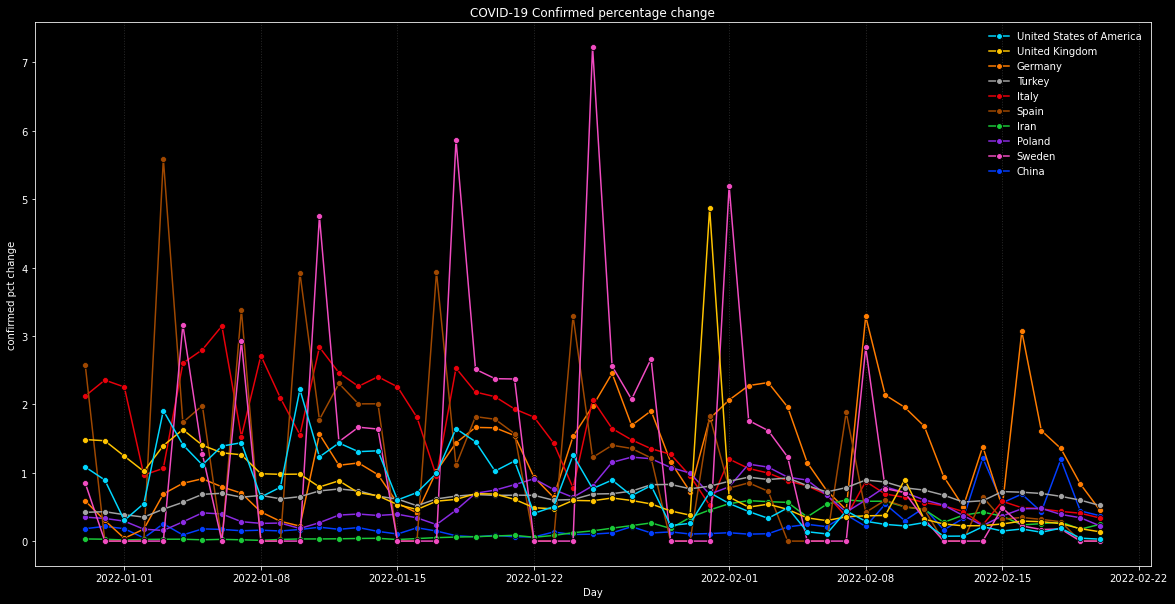

In [29]:


plotdata=new_df
plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='confirmed pct change',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Confirmed percentage change')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.grid(color='grey', linestyle=':', linewidth=1, alpha=0.3, axis="x")

plt.show();

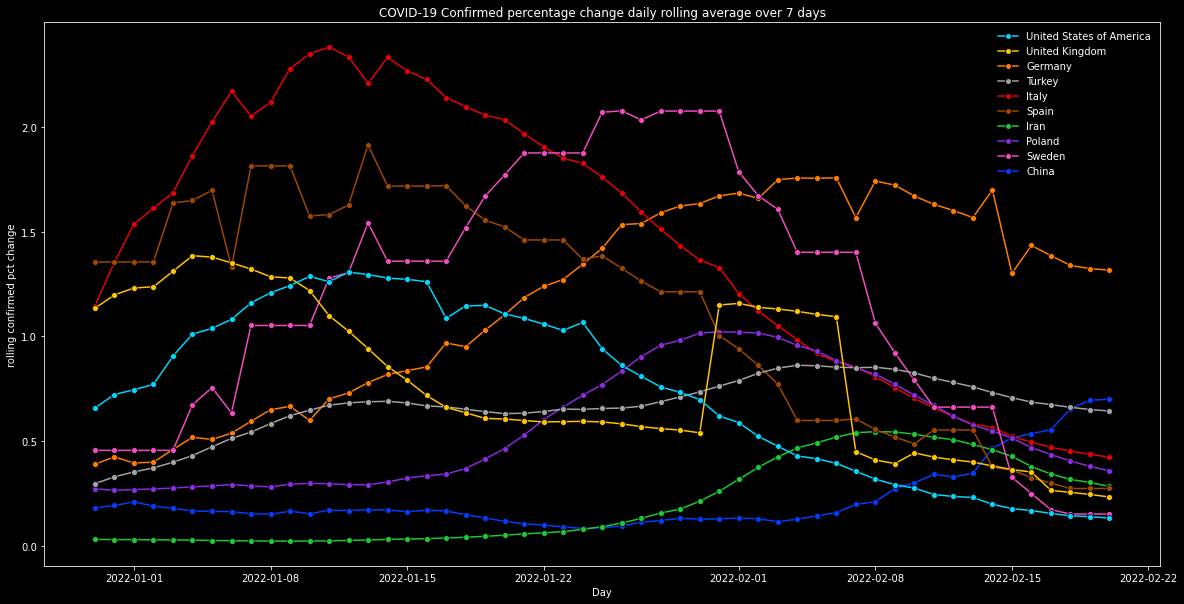

In [30]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='rolling confirmed pct change',
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Confirmed percentage change daily rolling average over %d days' % ROLL)

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

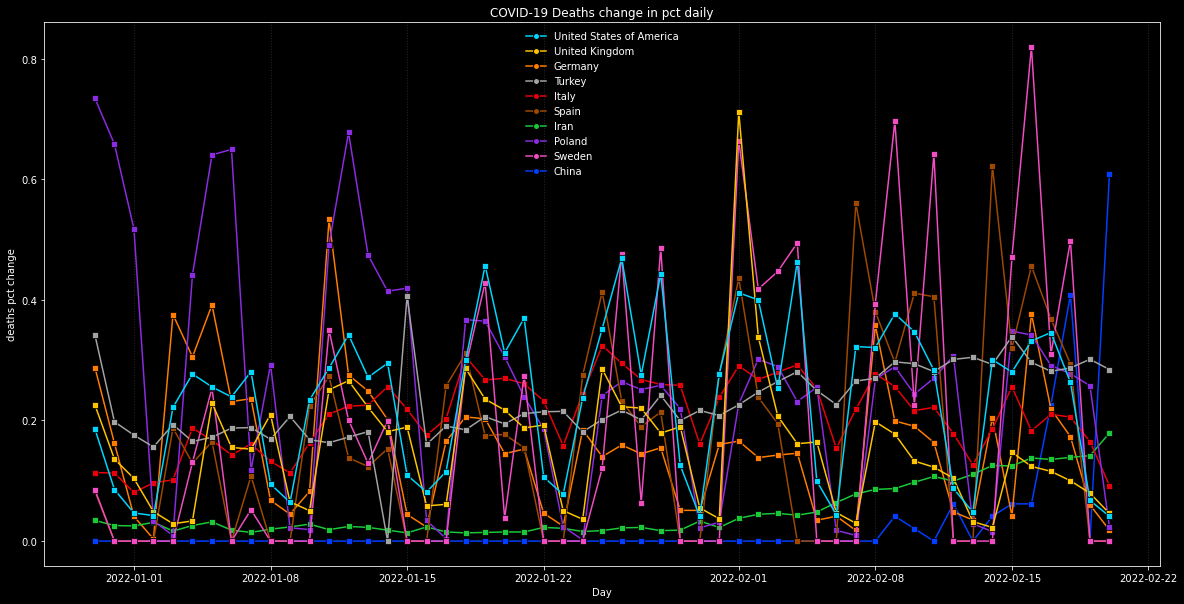

In [31]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='deaths pct change',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Deaths change in pct daily')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.grid(color='grey', linestyle=':', linewidth=1, alpha=0.3, axis="x")

plt.show();

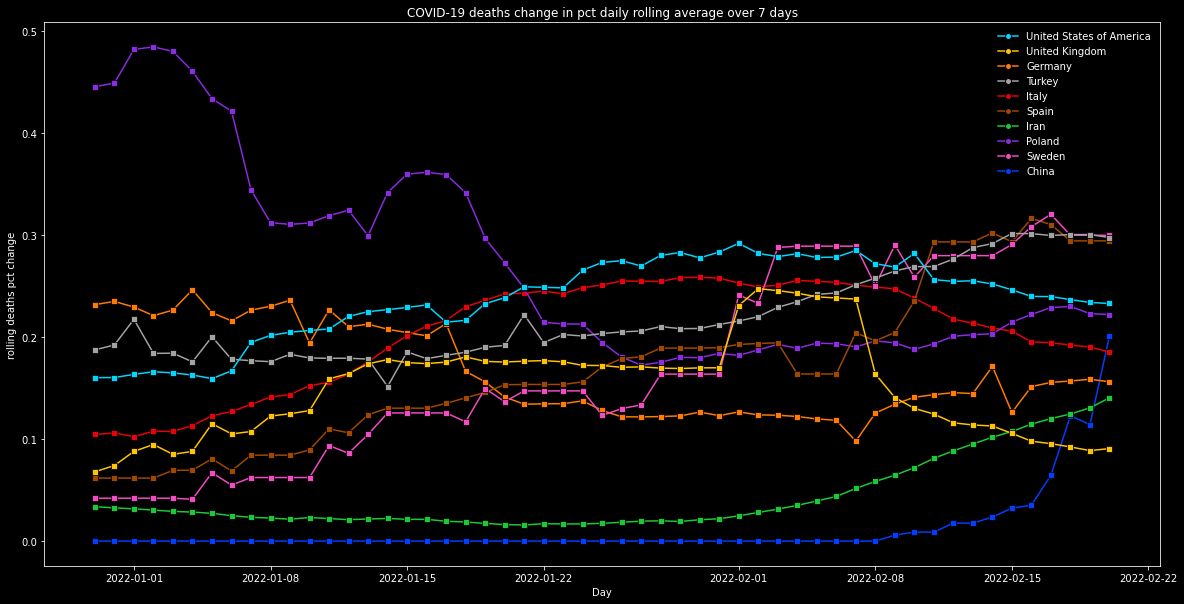

In [32]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='rolling deaths pct change',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 deaths change in pct daily rolling average over %d days' % ROLL)

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")


plt.show();

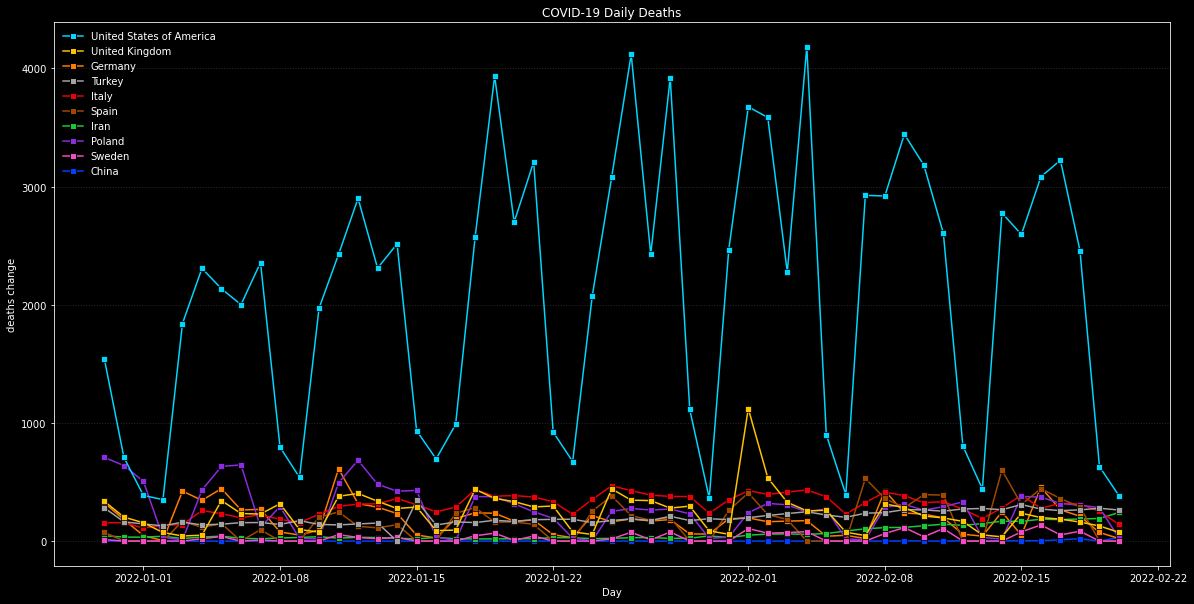

In [33]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='deaths change',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Daily Deaths')

handles, labels = fix_legend(chart, marker="s")
plt.legend(handles, labels, frameon=False, loc="best")

plt.grid(color='grey', linestyle=':', linewidth=1, alpha=0.3, axis="y")

plt.show();

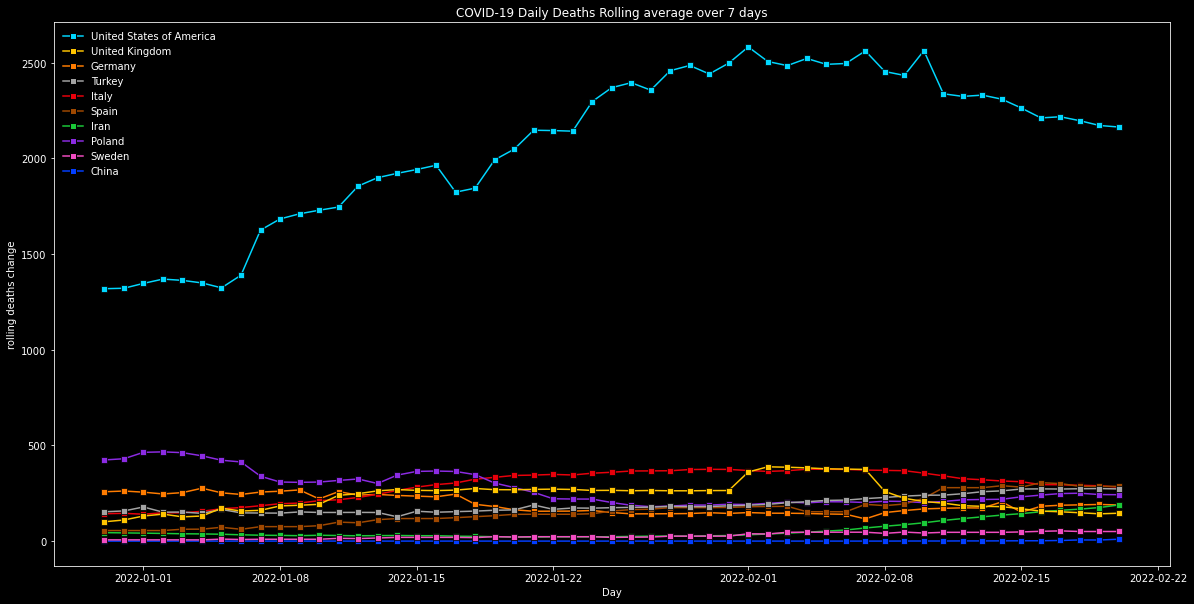

In [34]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='rolling deaths change',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Daily Deaths Rolling average over %d days' % ROLL)

handles, labels = fix_legend(chart, marker='s')
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

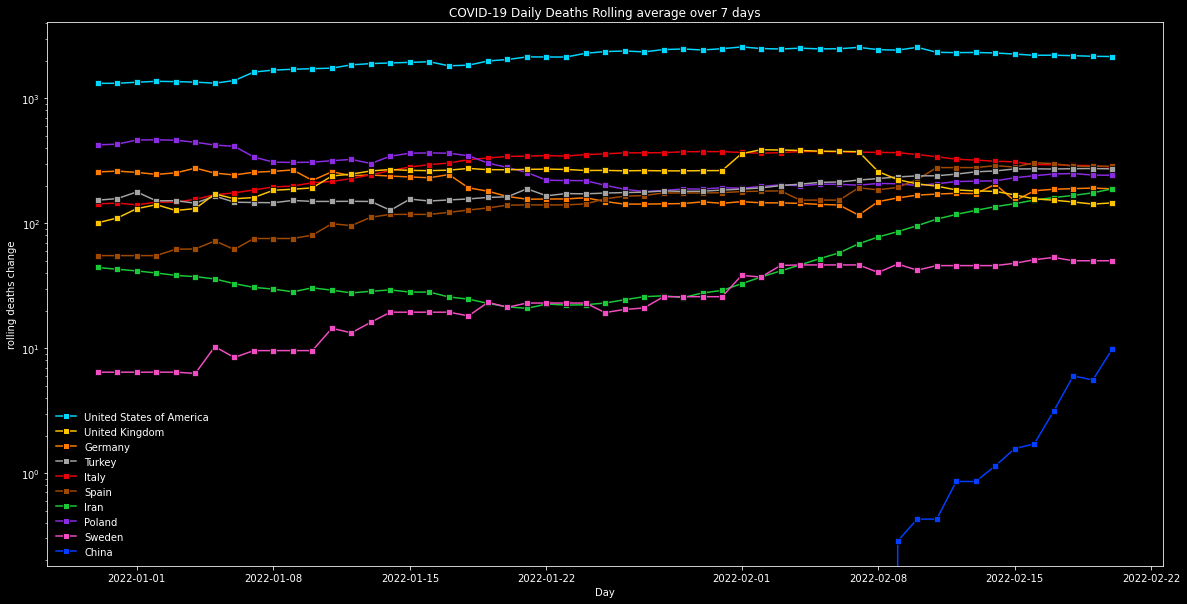

In [35]:
plotdata=new_df

plt.figure(figsize=(20,10))
plt.style.use("dark_background")

chart = sns.lineplot(x='Day',
                     y='rolling deaths change',
                     hue='Country',linestyle='-', marker='s',
                     palette='bright', markeredgecolor="black",   
                     data=plotdata
                    )

chart.set_title('COVID-19 Daily Deaths Rolling average over %d days' % ROLL)
plt.yscale("log")
handles, labels = fix_legend(chart, marker='s')
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

## Zmiana wymiaru _X_

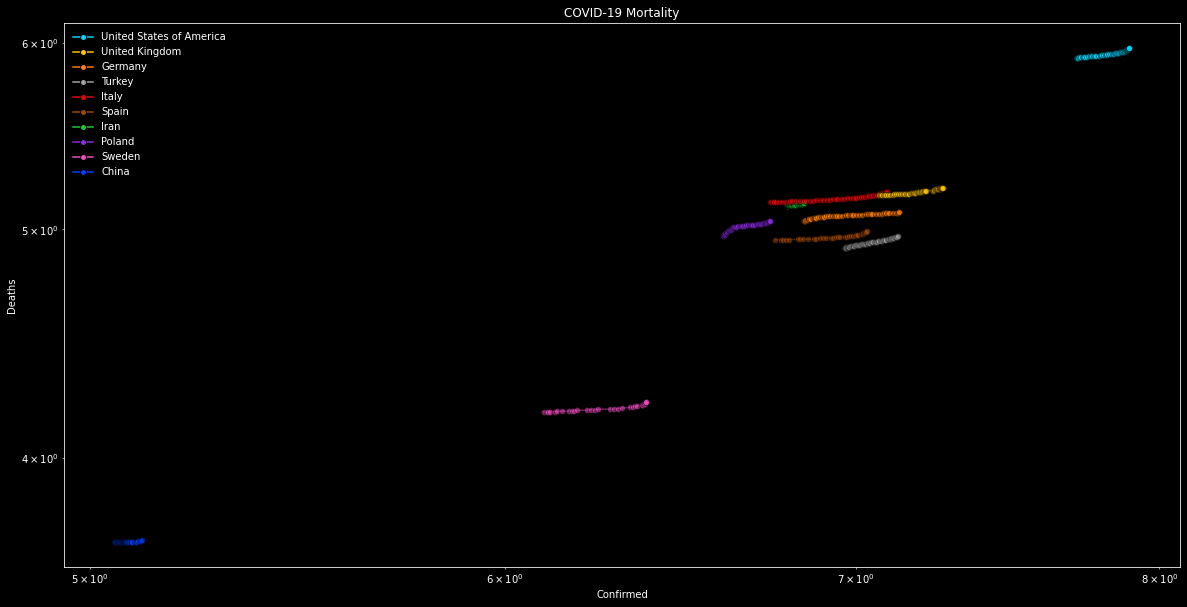

In [36]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")
plt.xscale("log")
plt.yscale("log")

chart = sns.lineplot(x='Confirmed',
                     y='Deaths', 
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     alpha=0.5,
                     data=df
                    )

chart.set_title('COVID-19 Mortality')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

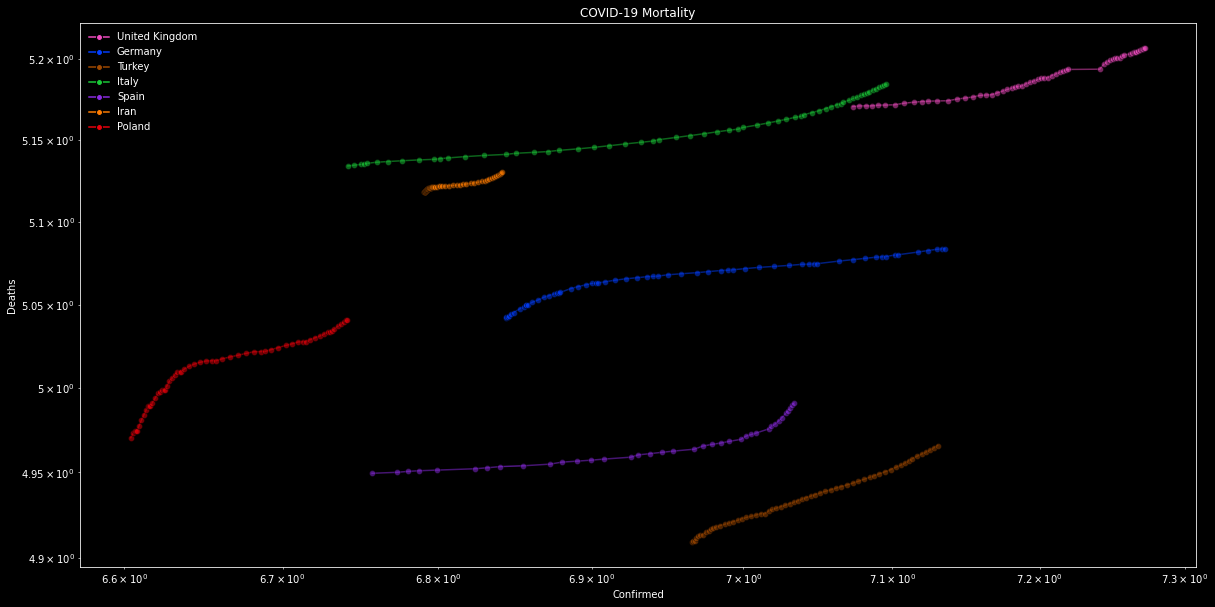

In [37]:
plt.figure(figsize=(20,10))
plt.style.use("dark_background")
plt.xscale("log")
plt.yscale("log")
df = df[ df['Country'] != 'China']
df = df[ df['Country'] != 'United States of America']
df = df[ df['Country'] != 'Sweden']
chart = sns.lineplot(x='Confirmed',
                     y='Deaths', 
                     hue='Country',linestyle='-', marker='o',
                     palette='bright', markeredgecolor="black",   
                     alpha=0.5,
                     data=df
                    )

chart.set_title('COVID-19 Mortality')

handles, labels = fix_legend(chart)
plt.legend(handles, labels, frameon=False, loc="best")

plt.show();

---